In [2]:
import pandas as pd
import quandl as qd
from datetime import datetime


In [3]:
qd.ApiConfig.api_key = ""
today = datetime.now().strftime('%Y-%m-%d')

In [418]:
ticker = 'DOCN'
msft_data = qd.get(f"EOD/{ticker}",
                   start_date="2020-01-01",
                   end_date=today)
#msft_data.tail()
msft_data

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2021-03-24,41.50,45.160,39.01,42.50,9032849.0,0.0,1.0,41.50,45.160,39.01,42.50,9032849.0
2021-03-25,42.36,45.000,39.50,41.76,1896020.0,0.0,1.0,42.36,45.000,39.50,41.76,1896020.0
2021-03-26,42.17,42.790,36.65,41.63,1395667.0,0.0,1.0,42.17,42.790,36.65,41.63,1395667.0
2021-03-29,41.91,44.010,39.86,40.06,1519239.0,0.0,1.0,41.91,44.010,39.86,40.06,1519239.0
2021-03-30,40.06,40.980,38.67,40.34,2094558.0,0.0,1.0,40.06,40.980,38.67,40.34,2094558.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-24,55.75,56.109,54.02,55.51,1538163.0,0.0,1.0,55.75,56.109,54.02,55.51,1538163.0
2021-08-25,54.88,55.880,53.13,55.82,1422457.0,0.0,1.0,54.88,55.880,53.13,55.82,1422457.0
2021-08-26,56.08,58.650,56.00,56.80,1528176.0,0.0,1.0,56.08,58.650,56.00,56.80,1528176.0


In [419]:
# assign `Adj Close` to `close_price`
close_price = msft_data[['Adj_Close']]
  
# returns as fractional change
daily_return = close_price.pct_change()
  
# replacing NA values with 0
daily_return.fillna(0, inplace=True)
  
print(daily_return)

adj_price = msft_data['Adj_Close']
  
# calculate the moving average
mav = adj_price.rolling(window=50).mean()
  
# print the result
print(mav[-30:])

            Adj_Close
Date                 
2021-03-24   0.000000
2021-03-25  -0.017412
2021-03-26  -0.003113
2021-03-29  -0.037713
2021-03-30   0.006990
...               ...
2021-08-24   0.005070
2021-08-25   0.005585
2021-08-26   0.017556
2021-08-27   0.056162
2021-08-30   0.037340

[111 rows x 1 columns]
Date
2021-07-20    45.9090
2021-07-21    46.1942
2021-07-22    46.4872
2021-07-23    46.8310
2021-07-26    47.2128
2021-07-27    47.5240
2021-07-28    47.8640
2021-07-29    48.1566
2021-07-30    48.4056
2021-08-02    48.6842
2021-08-03    49.0390
2021-08-04    49.3784
2021-08-05    49.6892
2021-08-06    49.9184
2021-08-09    50.1316
2021-08-10    50.4434
2021-08-11    50.7368
2021-08-12    51.0140
2021-08-13    51.2830
2021-08-16    51.5096
2021-08-17    51.7540
2021-08-18    52.0110
2021-08-19    52.2256
2021-08-20    52.4642
2021-08-23    52.7414
2021-08-24    52.9784
2021-08-25    53.2156
2021-08-26    53.4210
2021-08-27    53.6952
2021-08-30    53.9998
Name: Adj_Close, dtype: f

In [420]:
print(daily_return.max())
print(daily_return[daily_return['Adj_Close'] == daily_return['Adj_Close'].min()])

print(daily_return[daily_return['Adj_Close'] == daily_return['Adj_Close'].max()])




Adj_Close    0.115468
dtype: float64
            Adj_Close
Date                 
2021-05-10  -0.091962
            Adj_Close
Date                 
2021-06-22   0.115468


<AxesSubplot:xlabel='Date'>

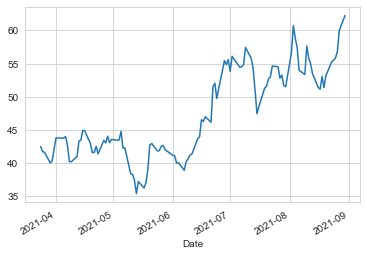

In [421]:
adj_price.plot()


<AxesSubplot:xlabel='Date'>

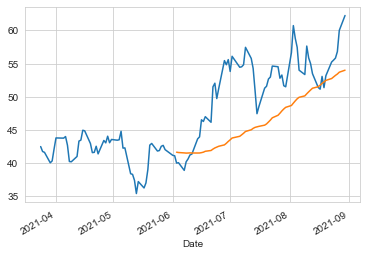

In [422]:
import matplotlib.pyplot as plt
  
adj_price.plot()
mav.plot()

<AxesSubplot:xlabel='Date'>

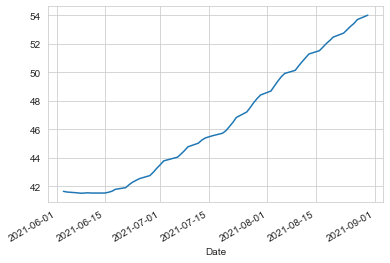

In [423]:
mav.plot()

In [424]:
import datetime as dt
msft_data.Adj_Close.dtype
a = msft_data
#a['Date'] = pd.to_datetime(data_df['Date'])
#data_df['Date'] = pd.to_datetime(data_df['Date'])
#data_df['Date']=data_df['Date'].map(dt.datetime.toordinal)
msft_data.head(3)
a.index = a.index.map(dt.datetime.toordinal)

In [425]:
#pd.to_datetime(a.index)
from scipy import stats
linear_regression = stats.linregress(x=a.index, y=a.Adj_Close)




In [426]:
linear_regression.slope


0.11792524533824561

In [427]:
linear_regression.intercept

-86975.92298043176

In [428]:
da=dt.date(year=2021, month=11, day=24)
date_wanted = da.toordinal()
#dt.datetime.toordinal('2021-11-01')

linear_regression.slope*date_wanted + linear_regression.intercept

66.82325814341311

In [429]:
import seaborn as sns


<ipython-input-430-bd71d3649adc>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels([dt.datetime.fromordinal(tm) for tm in xticks], rotation=50)


Text(0.5, 1.0, 'DOCN')

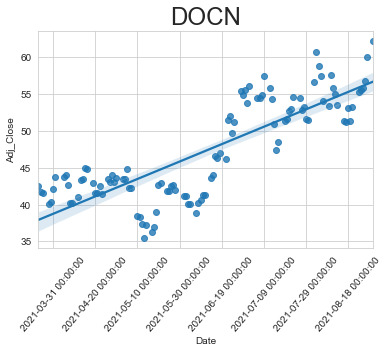

In [430]:
sns.set_style('whitegrid')
axes = sns.regplot(x=a.index, y=a.Adj_Close)


# get current xtick labels
xticks = axes.get_xticks()
xticks = [int(tm) for tm in xticks]
#print(xticks)
#print([dt.datetime.fromordinal(tm) for tm in xticks])
# convert all xtick labels to selected format from ms timestamp
axes.set_xticklabels([dt.datetime.fromordinal(tm) for tm in xticks], rotation=50)
axes.set_title(ticker, size = 24)
#axes.set_ylim(-10,30)

In [382]:
da=dt.date(year=2021, month=11, day=1)
date_wanted = da.toordinal()

# FROM ORDINAL
from_ordinal = dt.datetime.fromordinal(739000)
print(f"From ordinal - {from_ordinal}")

From ordinal - 2024-04-24 00:00:00
